<a href="https://colab.research.google.com/github/raisaurabh44/Practice_001/blob/main/Project_Loan_predition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 style="color: red;">Introduction</h1>


In [59]:
from IPython.display import Image

Image(url='https://pas-wordpress-media.s3.us-east-1.amazonaws.com/content/uploads/2015/12/loan-e1450497559334.jpg', width=400, height=250)


In finance, a loan is the lending of money by one or more individuals, organizations, or other entities to other individuals, organizations etc. The recipient (i.e., the borrower) incurs a debt and is usually liable to pay interest on that debt until it is repaid as well as to repay the principal amount borrowed. (wikipedia)

**The major aim of this notebook is to predict which of the customers will have their loan approved.**

In [60]:
Image(url='https://i.pinimg.com/originals/41/b0/08/41b008395e8e7f888666688915750d1f.gif', width=400, height=250)


**The main objective for this dataset:**

Using machine learning techniques to predict loan payments.

**Libraries**

In [61]:
import os # path to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings # warning filter

# Pllot libraries
import matplotlib.pyplot as plt
import seaborn as sns

# relevent ML libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# ML models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#defaut theam
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)


#Warning handle
warnings.filterwarnings('ignore')

Preprocessing and Data Analysis 💻

First look at the data:

In [62]:
tr_df=pd.read_csv('/content/drive/MyDrive/Loan_Predition_Project/train.csv')
tr_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
te_df=pd.read_csv('/content/drive/MyDrive/Loan_Predition_Project/test.csv')
te_df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [64]:
print(f"training set(row : col): {tr_df.shape}\n\ntesting set (row : col): {te_df.shape}")

training set(row : col): (614, 13)

testing set (row : col): (367, 12)


In [65]:
# Column Information
tr_df.info(verbose=True, null_counts=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [66]:
te_df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [67]:
# Summary statistics
tr_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [68]:
te_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [82]:
# Id column is not needed , Lets drop it from both data set

tr_df.drop('Loan_ID', axis=1, inplace=True)
te_df.drop('Loan_ID', axis=1, inplace=True)

# Checking new shape
print(f"training set(row : col): {tr_df.shape}\n\ntesting set (row : col): {te_df.shape}")

training set(row : col): (614, 12)

testing set (row : col): (367, 11)


**Missing values 🚫**

As you can see we have some missing data, let's have a look how many we have for each column:

In [83]:
tr_df.isnull().sum().sort_values(ascending=True)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [84]:
# From above we can see the columns with some null values

null_cols= ['Married','Gender','Loan_Amount_Term','Dependents', 'LoanAmount', 'Self_Employed', 'Credit_History']
null_cols

['Married',
 'Gender',
 'Loan_Amount_Term',
 'Dependents',
 'LoanAmount',
 'Self_Employed',
 'Credit_History']

In [85]:
print(f"\nBefore filling missing value\n\n")
for col in null_cols:
  print(f"{col} :\n{tr_df[col].value_counts()}\n")
  tr_df[col]=tr_df[col].fillna(tr_df[col].dropna().mode().values[0])

tr_df.isnull().sum().sort_values(ascending=True)
print(f"\nAfter filling missing values with mode \n\n")
for col in null_cols:
  print(f"{col} :\n{tr_df[col].value_counts()}\n")


Before filling missing value


Married :
Yes    401
No     213
Name: Married, dtype: int64

Gender :
Male      502
Female    112
Name: Gender, dtype: int64

Loan_Amount_Term :
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Dependents :
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

LoanAmount :
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

Self_Employed :
No     532
Yes     82
Name: Self_Employed, dtype: int64

Credit_History :
1.0    525
0.0     89
Name: Credit_History, dtype: int64


After filling missing values with mode 


Married :
Yes    401
No     213
Name: Married, dtype: int64

Gender :
Male      502
Female    112
Name: Gender, dtype: int64

Loan_Amount_Term :
360.0    526
180.0     44
480.0     15
300.0

In [86]:
tr_df.isnull().sum().sort_values(ascending=True)

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [87]:
tr_df.duplicated().sum()

0

In [88]:
tr_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [89]:
columns_list= tr_df[['Gender', 'Married', 'Dependents', 'Education',
                     'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']]
columns_list

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,360.0,1.0,Urban,Y


In [90]:
for column in columns_list:
    unique_values = tr_df[column].unique()
    print(f"Unique values in '{column}':")
    print(unique_values)
    print()  # Empty line for separation


Unique values in 'Gender':
['Male' 'Female']

Unique values in 'Married':
['No' 'Yes']

Unique values in 'Dependents':
['0' '1' '2' '3+']

Unique values in 'Education':
['Graduate' 'Not Graduate']

Unique values in 'Self_Employed':
['No' 'Yes']

Unique values in 'Loan_Amount_Term':
[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]

Unique values in 'Credit_History':
[1. 0.]

Unique values in 'Property_Area':
['Urban' 'Rural' 'Semiurban']

Unique values in 'Loan_Status':
['Y' 'N']



**Data visalization 📊**

Firstly we need to split our data to categorical and numerical data,  

**Loan status distribution**

In [91]:
# List of all the columns
cols= tr_df.columns.tolist()
# List of all the numeric columns
num = tr_df.select_dtypes('number').columns.to_list()
print(num)
# List all the categorical columns
cat = tr_df.select_dtypes('object').columns.to_list()
print(cat)
# numeric df
loan_num=tr_df[num]
# catagorical df
loan_cat=tr_df[cat]

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


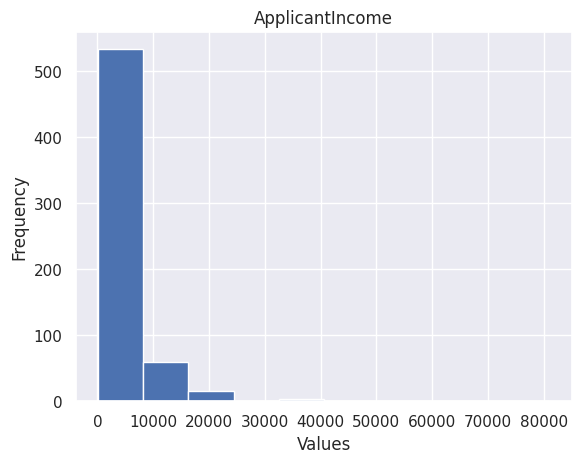

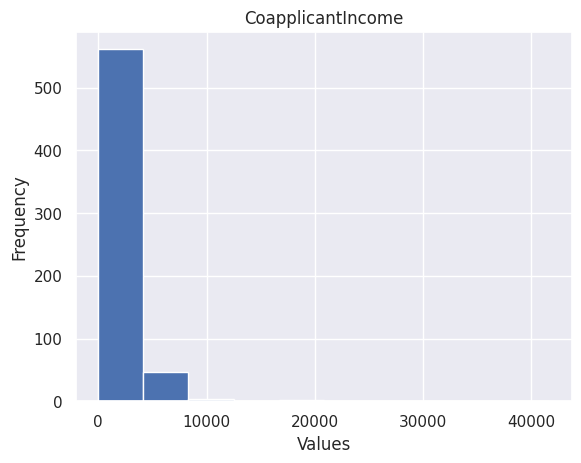

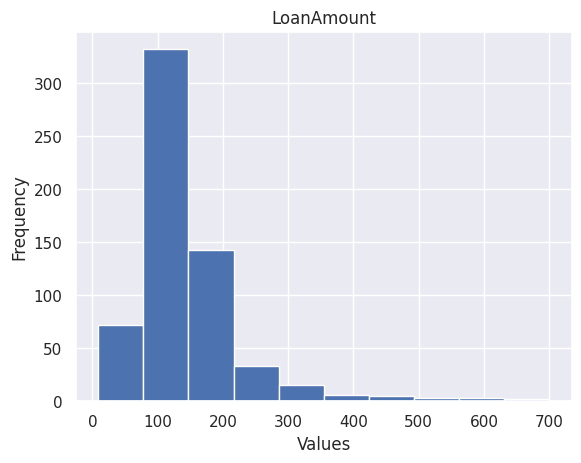

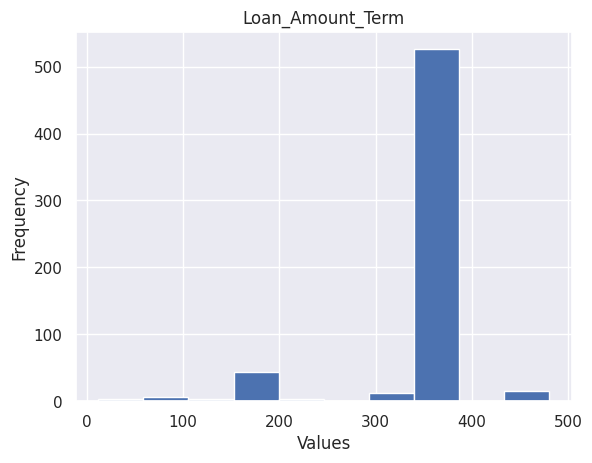

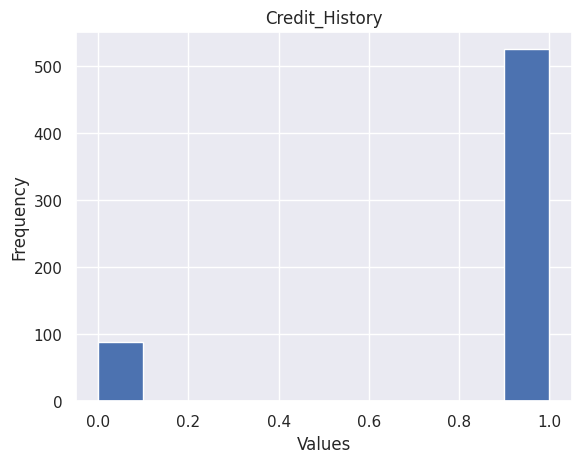

In [92]:
for i in loan_num:
  plt.hist(loan_num[i])
  plt.title(i)
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

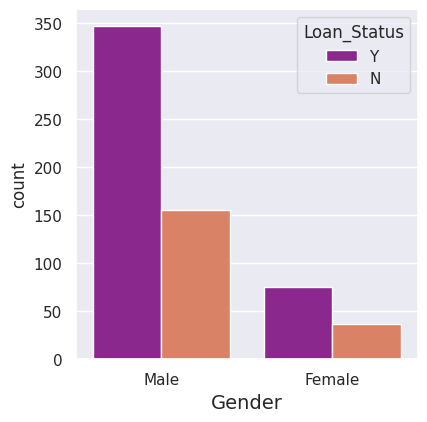

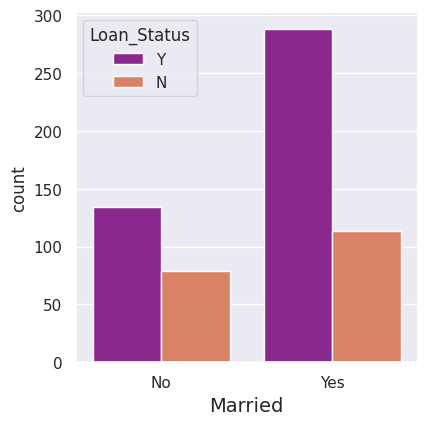

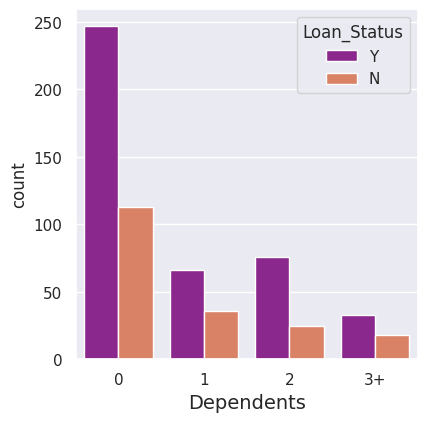

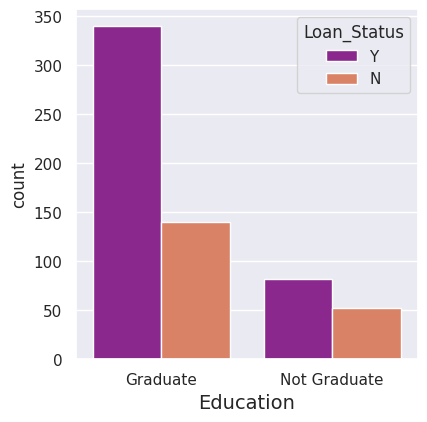

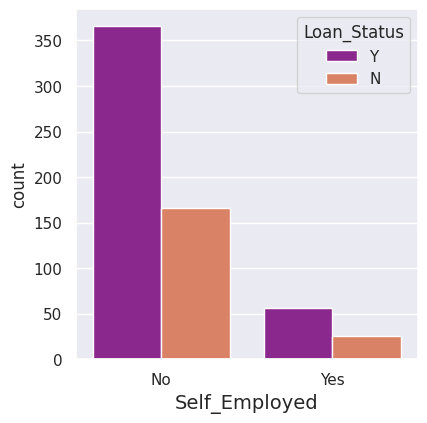

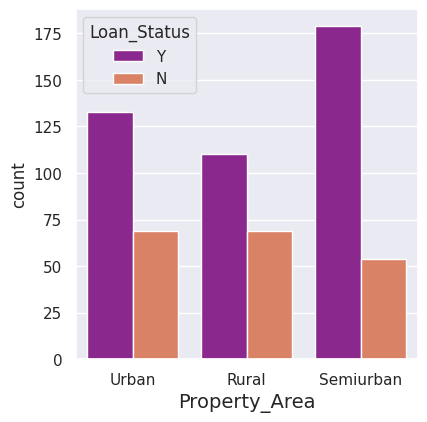

In [96]:
for i in cat[:-1]:
  plt.figure(figsize=(15,10))
  plt.subplot(2,3,1)
  sns.countplot(tr_df, x=i,hue='Loan_Status',palette='plasma')
  plt.xlabel(i,fontsize=14)

**Encoding data to numeric**